**CLASSIFYING MOVIE REVIEWS: A BINARY CLASSIFICATION PROJECT**

Loading the dataset

In [37]:
from keras.datasets import imdb

In [38]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most fre
quently occurring words in the training data. Rare words will be discarded. This allows
 me to work with vector data of manageable size.

 The variables train_data and test_data are lists of reviews; each review is a list of
 word indices (encoding a sequence of words). train_labels and test_labels are
 lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

 Because I'm restricting myself to the top 10,000 most frequent words, no word
 index will exceed 10,000:

In [5]:
max([max(sequence) for sequence in train_data])


9999

 **Preparing the data**

 You can’t feed lists of integers into a neural network. You have to turn your lists into
 tensors. There are two ways to do that:

  Pad the lists so that they all have the same length, turn them into an integer
 tensor of shape (samples, word_indices), and then use as the first layer in
 your network a layer capable of handling such integer tensors (the Embedding
 layer, which we’ll cover in detail later in the book).

  One-hot encode the lists to turn them into vectors of 0s and 1s. This would
 mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vec
tor that would be all 0s except for indices 3 and 5, which would be 1s. Then you
 could use as the first layer in your network a Dense layer, capable of handling
 floating-point vector data.

**Encoding the integer sequences into a binary matrix**

In [39]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
   results = np.zeros((len(sequences), dimension))
   for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
   return results

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [41]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Also vectorize the labels, which is straightforward:

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

 Building my network

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [45]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

 Validating your approach

 In order to monitor during training the accuracy of the model on data it has never
 seen before, I’ll create a validation set by setting apart 10,000 samples from the
 original training data.

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

 I’ll now train the model for 20 epochs (20 iterations over all samples in the
 x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
 I’ll monitor loss and accuracy on the 10,000 samples that I set apart. I do so by
 passing the validation data as the validation_data argument.

**Training your model**

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - acc: 0.6957 - loss: 0.5974 - val_acc: 0.8576 - val_loss: 0.4010
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8915 - loss: 0.3408 - val_acc: 0.8831 - val_loss: 0.3125
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9244 - loss: 0.2444 - val_acc: 0.8809 - val_loss: 0.2939
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9342 - loss: 0.1971 - val_acc: 0.8770 - val_loss: 0.3032
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9460 - loss: 0.1678 - val_acc: 0.8893 - val_loss: 0.2729
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9559 - loss: 0.1376 - val_acc: 0.8865 - val_loss: 0.2805
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9588 - loss: 0.1229 - val_acc: 0.8782 - val_loss: 0.3191
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9730 - loss: 0.0990 - val_acc: 0.8855 - val_loss: 0.3046
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9783

The call to model.fit() returns a History object. This object has a mem
ber history, which is a dictionary containing data about everything that happened
 during training. Let’s look at it:

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

 **Plotting the training and validation loss**

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)



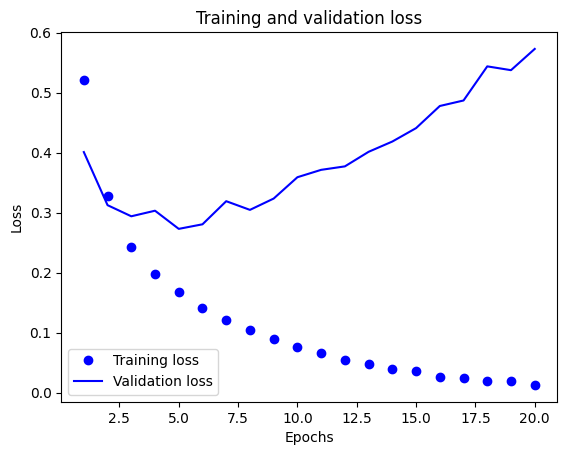

In [49]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

In [50]:
#plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

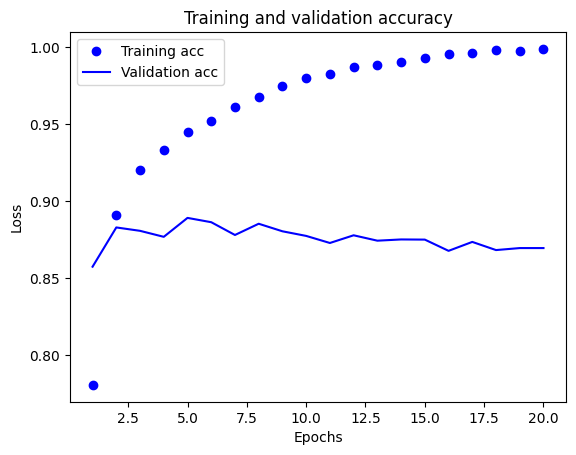

In [51]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 As you can see, the training loss decreases with every epoch, and the training accuracy
 increases with every epoch. That’s what you would expect when running gradient
descent optimization—the quantity you’re trying to minimize should be less with
 every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
 peak at the fourth epoch. This is an example of a
 model that performs better on the training data isn’t necessarily a model that will do
 better on data it has never seen before. In precise terms, what you’re seeing is overfit
ting: after the second epoch, you’re overoptimizing on the training data, and you end
 up learning representations that are specific to the training data and don’t generalize
 to data outside of the training set.